## 1. Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

## 2. Data Preprocessing
Drop the first columns of each dataset

In [3]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.drop(df_train.columns[0], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)
df_train.head(10)

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman   
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort   
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins   
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd   
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche   

        category     amt      first      last gender  \
0       misc_net    4.97   Jennifer     Banks      F   
1    grocery_pos  107.23  Stephanie      Gill      F   
2  entertainment  220.11     Edward   Sanchez      M   
3  gas_transport   45.00     Jeremy     White      M   
4       misc_pos   41.96      Tyler    Garcia      M   
5  gas_transport   94.63   Jennifer    Conner      F   
6    grocery_net   44.54     Kelsey  Richards      F   
7  gas_transport   71.65     Steven  Williams      M   
8       misc_pos    4.27    Heather     Chase      F   
9    grocery_pos  198.39    Melissa   Aguilar      F   

                           street            city state    zip      lat  \
0                  561 Perry Cove  Moravian Falls    NC  28654  36.0788   
1    43039 Riley Greens Suite 393          Orient    WA  99160  48.8878   
2        594 White Dale Suite 530      Malad City    ID  83252  42.1808   
3     9443 Cynthia Court Apt. 038         Boulder    MT  59632  46.2306   
4                408 Bradley Rest        Doe Hill    VA  24433  38.4207   
5               4655 David Island          Dublin    PA  18917  40.3750   
6     889 Sarah Station Suite 624         Holcomb    KS  67851  37.9931   
7       231 Flores Pass Suite 720        Edinburg    VA  22824  38.8432   
8     6888 Hicks Stream Suite 954           Manor    PA  15665  40.3359   
9  21326 Taylor Squares Suite 708     Clarksville    TN  37040  36.5220   

       long  city_pop                                job         dob  \
0  -81.1781      3495          Psychologist, counselling  1988-03-09   
1 -118.2105       149  Special educational needs teacher  1978-06-21   
2 -112.2620      4154        Nature conservation officer  1962-01-19   
3 -112.1138      1939                    Patent attorney  1967-01-12   
4  -79.4629        99     Dance movement psychotherapist  1986-03-28   
5  -75.2045      2158                  Transport planner  1961-06-19   
6 -100.9893      2691                    Arboriculturist  1993-08-16   
7  -78.6003      6018               Designer, multimedia  1947-08-21   
8  -79.6607      1472          Public affairs consultant  1941-03-07   
9  -87.3490    151785                        Pathologist  1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

   is_fraud  
0         0  
1         0  
2         0  
3  

Show the column names

In [4]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Split each Dataset into X dataset (consist of nontarget features) and y dataset for target feature ('is_fraud')

In [10]:
X = df_train.drop('is_fraud', axis = 1)
y = df_train['is_fraud']

Rename some column names so we can easily read the column names

In [11]:
X.rename(columns = {'trans_date_trans_time':'transaction_time', 'cc_num':'credit_card_number', 'amt':'amount', 'trans_num':'transaction_id'}, inplace = True)
X.columns

Index(['transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [12]:
X.head(5)

transaction_time  credit_card_number  \
0  2019-01-01 00:00:18    2703186189652095   
1  2019-01-01 00:00:44        630423337322   
2  2019-01-01 00:00:51      38859492057661   
3  2019-01-01 00:01:16    3534093764340240   
4  2019-01-01 00:03:06     375534208663984   

                             merchant       category  amount      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street            city state    zip  \
0    Banks      F                561 Perry Cove  Moravian Falls    NC  28654   
1     Gill      F  43039 Riley Greens Suite 393          Orient    WA  99160   
2  Sanchez      M      594 White Dale Suite 530      Malad City    ID  83252   
3    White      M   9443 Cynthia Court Apt. 038         Boulder    MT  59632   
4   Garcia      M              408 Bradley Rest        Doe Hill    VA  24433   

       lat      long  city_pop                                job         dob  \
0  36.0788  -81.1781      3495          Psychologist, counselling  1988-03-09   
1  48.8878 -118.2105       149  Special educational needs teacher  1978-06-21   
2  42.1808 -112.2620      4154        Nature conservation officer  1962-01-19   
3  46.2306 -112.1138      1939                    Patent attorney  1967-01-12   
4  38.4207  -79.4629        99     Dance movement psychotherapist  1986-03-28   

                     transaction_id   unix_time  merch_lat  merch_long  
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315  
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462  
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481  
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071  
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459

**Lasso Regression (for numerical features)**

For our further analysis with machine learning model, we can throw some irrelevant numerical features away. Here we will use lasso regression, because there are only few features that will create large effects on our prediction of fraud transaction. After the lasso regression is implemented, the irrelevant features will have zero lasso coefficient. 

In [13]:
X.describe()

credit_card_number        amount           zip           lat  \
count        1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean         4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std          1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min          6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%          1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%          3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%          4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max          4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01  
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01  
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02  
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01  
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01  
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01  
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01

In [16]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
numerical_features = ['credit_card_number','amount','zip',
       'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

#Use fit_transform methode on X_train, so the model will learn from train dataset and the data will be normalised. 
X_train_scaled = scaler.fit_transform(X_train[numerical_features] )
#Use only transform methode on X_test, because the model should not learn from test dataset. 
#We only have to normalise this dataset. 
X_test_scaled = scaler.transform(X_test[numerical_features])

linlasso = Lasso().fit(X_train_scaled, y_train)
#max_iter to avoid converge warning. More leads to more computing time

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train[numerical_features]), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 0.0057686019417875056
lasso regression linear model coeff:
[-0.  0. -0.  0.  0.  0.  0.  0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.000

Features with non-zero weight (sorted by absolute magnitude):


As you can see above, the R-squared scores are very low. This might be caused of imbalanced datasets. Now we have to balance the data. There are 7506 fraudulent transactions in training dataset. We will randomly choose 7506 genuine dataset from training dataset and concatenate this genuine transaction to the fraudulent transaction. Then we will have 50/50 ratio of genuine transactions and fraudulent transactions. This methode is called Random Under-Sampling. Now we have to balance the data from the original datasets (df_train). 

In [17]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [18]:
# Lets shuffle the data before creating the subsamples

df_train = df_train.sample(frac=1)

# amount of fraud classes 7506 rows.
fraud_df = df_train.loc[df_train['is_fraud'] == 1]
non_fraud_df = df_train.loc[df_train['is_fraud'] == 0][:7506]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.shape

(15012, 22)


Now split the data between nontarget features and target feature ('is_fraud')

In [23]:
X = new_df.drop('is_fraud', axis=1)
X.rename(columns = {'trans_date_trans_time':'transaction_time', 'cc_num':'credit_card_number', 'amt':'amount', 'trans_num':'transaction_id'}, inplace = True)
y = new_df['is_fraud']
print(X.shape)
print(y.shape)

(15012, 21)
(15012,)


I am not sure, what the R-squared scores are still very low. Maybe ridge and lasso regressions are not suitable for our dataset. 

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: is_fraud, dtype: float64


C:\Users\xyz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


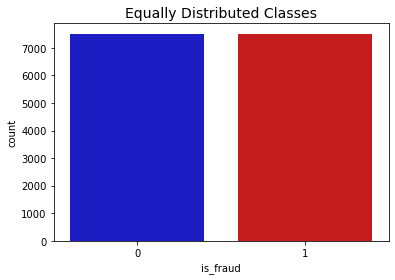

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['is_fraud'].value_counts()/len(new_df))
colors = ["#0101DF", "#DF0101"]


sns.countplot('is_fraud', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [21]:
corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Balanced Correlation Matrix", fontsize=14)

Text(0.5, 1.0, 'Balanced Correlation Matrix')

By implementing Lasso regression to balanced dataset, we still have bad regression performance. We still can see that all the coefficients of numerical features are zero. It would mean, that all this numerical features are irrelevant. That would make no sense, because from Correlation matrix, we can see that atleast feature *Amount* has big effect in predicting fraud transaction. 

I (Emil) am not sure why, maybe it is caused by choosing a wrong regression model? 

In [22]:
scaler = MinMaxScaler()
numerical_features = ['credit_card_number','amount','zip',
       'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)

#Use fit_transform methode on X_train, so the model will learn from train dataset and the data will be normalised. 
X_train_scaled = scaler.fit_transform(X_train[numerical_features] )
#Use only transform methode on X_test, because the model should not learn from test dataset. 
#We only have to normalise this dataset. 
X_test_scaled = scaler.transform(X_test[numerical_features])

linlasso = Lasso().fit(X_train_scaled, y_train)
#max_iter to avoid converge warning. More leads to more computing time

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 0.4998667732480682
lasso regression linear model coeff:
[-0.  0. -0.  0.  0.  0.  0.  0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.000

Features with non-zero weight (sorted by absolute magnitude):


In [24]:
X.head()

transaction_time  credit_card_number                    merchant  \
1030485  2020-03-02 22:46:08     376944481517097  fraud_Jaskolski-Vandervort   
149947   2019-03-22 03:14:57     372520049757633         fraud_Friesen-Stamm   
541322   2019-08-19 19:35:33    6011109736646996            fraud_Metz-Boehm   
86499    2019-02-20 08:17:46    4328928491302401         fraud_Padberg-Welch   
132048   2019-03-13 23:00:45    3547336099599450           fraud_Gerlach Inc   

              category   amount     first      last gender  \
1030485       misc_net   820.89   Tiffany  Stephens      F   
149947   gas_transport     9.21      Lori   Ramirez      F   
541322    shopping_pos     7.98   Rebecca  Erickson      F   
86499      grocery_pos   190.16  Margaret       Ray      F   
132048    shopping_net  1097.96     Larry    Garcia      M   

                               street        city state    zip      lat  \
1030485               1447 Ryan Lodge   Grand Bay    AL  36541  30.4983   
149947           4293 Ramirez Squares      Ranier    MN  56668  48.6031   
541322      594 Berry Lights Apt. 392  Wilmington    NC  28405  34.2651   
86499    927 Cummings Manor Suite 318   Greendale    WI  53129  42.9373   
132048              24809 Cross Creek      Beacon    NY  12508  41.5097   

            long  city_pop                                   job         dob  \
1030485 -88.3282     15647              Scientist, physiological  1957-12-26   
149947  -93.2977       136                     Ceramics designer  2000-02-20   
541322  -77.8670    186140  English as a second language teacher  1983-02-08   
86499   -87.9943     13973    Logistics and distribution manager  1981-05-06   
132048  -73.9634     19880                                Lawyer  1962-11-15   

                           transaction_id   unix_time  merch_lat  merch_long  
1030485  e65148c92f227827c555c5a5b3ff9f50  1362264368  30.032321  -89.278306  
149947   5128c5f1283fd05d7169aa9a2ad7c68d  1332386097  47.931622  -92.451435  
541322   2143d2ac176fc8dc53faf28d3798f42b  1345404933  33.416955  -78.012583  
86499    3824b739377ac9c6a30aedff31220b05  1329725866  43.306366  -88.059200  
132048   b1ebda701fbd0285f6979a4930e027b4  1331679645  40.900350  -73.611251

In [25]:
y.head()

1030485    1
149947     1
541322     0
86499      0
132048     1
Name: is_fraud, dtype: int64